# Learn UNET architecture from scratch with Pytorch

This is my first model UNET architecture in Pytorch.

The link of the paper is :

https://arxiv.org/pdf/1505.04597v1.pdf

So we get the following picture of the architecture :



# With Pytorch

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

In [2]:
class UNET(nn.Module):
    def __init__(self):
        super(UNET,self).__init__()
        
        self.encoder_block1 = nn.Sequential(
                                            nn.Conv2d(3, 64, 3, padding = 1)
                                           ,nn.ReLU(inplace = True)
                                           ,nn.Conv2d(64, 64, 3, padding = 1)
                                           ,nn.ReLU(inplace = True)
                                           )
        
        self.encoder_block1_pool = nn.MaxPool2d(kernel_size = 2,stride = 2)

        self.encoder_block2 = nn.Sequential(
                                            nn.Conv2d(64, 128, 3, padding = 1)
                                           ,nn.ReLU(inplace = True)
                                           ,nn.Conv2d(128, 128, 3, padding = 1)
                                           ,nn.ReLU(inplace = True)
                                           )
        
        self.encoder_block2_pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.encoder_block3 = nn.Sequential(
                                            nn.Conv2d(128, 256, 3, padding=1)
                                           ,nn.ReLU(inplace = True)
                                           ,nn.Conv2d(256, 256, 3, padding=1)
                                           ,nn.ReLU(inplace = True)
                                           )
        
        self.encoder_block3_pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.encoder_block4 = nn.Sequential(
                                            nn.Conv2d(256, 512, 3, padding=1)
                                           ,nn.ReLU(inplace = True)
                                           ,nn.Conv2d(512, 512, 3, padding=1)
                                           ,nn.ReLU(inplace = True)
                                           )
        
        self.encoder_block4_pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.encoder_block5 = nn.Sequential(
                                            nn.Conv2d(512, 1024, 3, padding=1)
                                           ,nn.ReLU(inplace = True)
                                           ,nn.Conv2d(1024, 1024, 3, padding=1)
                                           ,nn.ReLU(inplace = True)
                                           )
                
        self.ConvTrans4 = nn.ConvTranspose2d(1024 , 1024, kernel_size=2, stride=2)        
        self.decoder_block4 = nn.Sequential(
                                            nn.Conv2d(1024 + 512, 512, 3, padding = 1)
                                           ,nn.ReLU(inplace = True)
                                           ,nn.Conv2d(512, 512, 3, padding = 1)
                                           ,nn.ReLU(inplace = True)
                                           )
        
        self.ConvTrans3 = nn.ConvTranspose2d(512 , 512, kernel_size=2, stride=2)
        self.decoder_block3 = nn.Sequential(
                                            nn.Conv2d(512 + 256, 256, 3, padding = 1)
                                           ,nn.ReLU(inplace = True)
                                           ,nn.Conv2d(256, 256, 3, padding = 1)
                                           ,nn.ReLU(inplace = True)
                                           )

        self.ConvTrans2 = nn.ConvTranspose2d(256 , 256, kernel_size=2, stride=2)
        self.decoder_block2 = nn.Sequential(
                                            nn.Conv2d(256 + 128, 128, 3, padding = 1)
                                           ,nn.ReLU(inplace = True)
                                           ,nn.Conv2d(128, 128, 3, padding = 1)
                                           ,nn.ReLU(inplace = True)
                                           )
        
        self.ConvTrans1 = nn.ConvTranspose2d(128 , 128, kernel_size=2, stride=2)
        self.decoder_block1 = nn.Sequential(
                                            nn.Conv2d(128 + 64, 64, 3, padding = 1)
                                           ,nn.ReLU(inplace = True)
                                           ,nn.Conv2d(64, 64, 3, padding = 1)
                                           ,nn.ReLU(inplace = True)
                                           )
        
        self.final_block = nn.Sequential(
                                        nn.Conv2d(64,64,3,padding=1)
                                       ,nn.BatchNorm2d(64)
                                       ,nn.ReLU(inplace = True)
                                       ,nn.Conv2d(64,64,3,padding=1)
                                       ,nn.BatchNorm2d(64)
                                       ,nn.ReLU(inplace = True)
                                       ,nn.Conv2d(64,3,3,padding=1)
                                       )
        
    def forward(self,x):
        conv1 = self.encoder_block1(x)
        x = self.encoder_block1_pool(conv1)

        conv2 = self.encoder_block2(x)
        x = self.encoder_block2_pool(conv2)
        
        conv3 = self.encoder_block3(x)
        #print(conv3.shape)
        x = self.encoder_block3_pool(conv3)   
     
        conv4 = self.encoder_block4(x)
        x = self.encoder_block4_pool(conv4)
        
        conv5 = self.encoder_block5(x)
        
        x = self.ConvTrans4(conv5)        
        x = torch.cat([x, conv4], dim=1)         
        x = self.decoder_block4(x)
        
        x = self.ConvTrans3(x)
        x = torch.cat([x, conv3], dim=1)       
        #print(x.shape)
        x = self.decoder_block3(x)
        
        x = self.ConvTrans2(x)
        x = torch.cat([x, conv2], dim=1)       
        x = self.decoder_block2(x)
        
        x = self.ConvTrans1(x)
        x = torch.cat([x, conv1], dim=1)       
        x = self.decoder_block1(x)
        
        out = self.final_block(x)
        
        return x

In [3]:
from torchsummary import summary

model = UNET()
summary(model.cuda(), input_size = (3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           1,792
              ReLU-2         [-1, 64, 128, 128]               0
            Conv2d-3         [-1, 64, 128, 128]          36,928
              ReLU-4         [-1, 64, 128, 128]               0
         MaxPool2d-5           [-1, 64, 64, 64]               0
            Conv2d-6          [-1, 128, 64, 64]          73,856
              ReLU-7          [-1, 128, 64, 64]               0
            Conv2d-8          [-1, 128, 64, 64]         147,584
              ReLU-9          [-1, 128, 64, 64]               0
        MaxPool2d-10          [-1, 128, 32, 32]               0
           Conv2d-11          [-1, 256, 32, 32]         295,168
             ReLU-12          [-1, 256, 32, 32]               0
           Conv2d-13          [-1, 256, 32, 32]         590,080
             ReLU-14          [-1, 256,

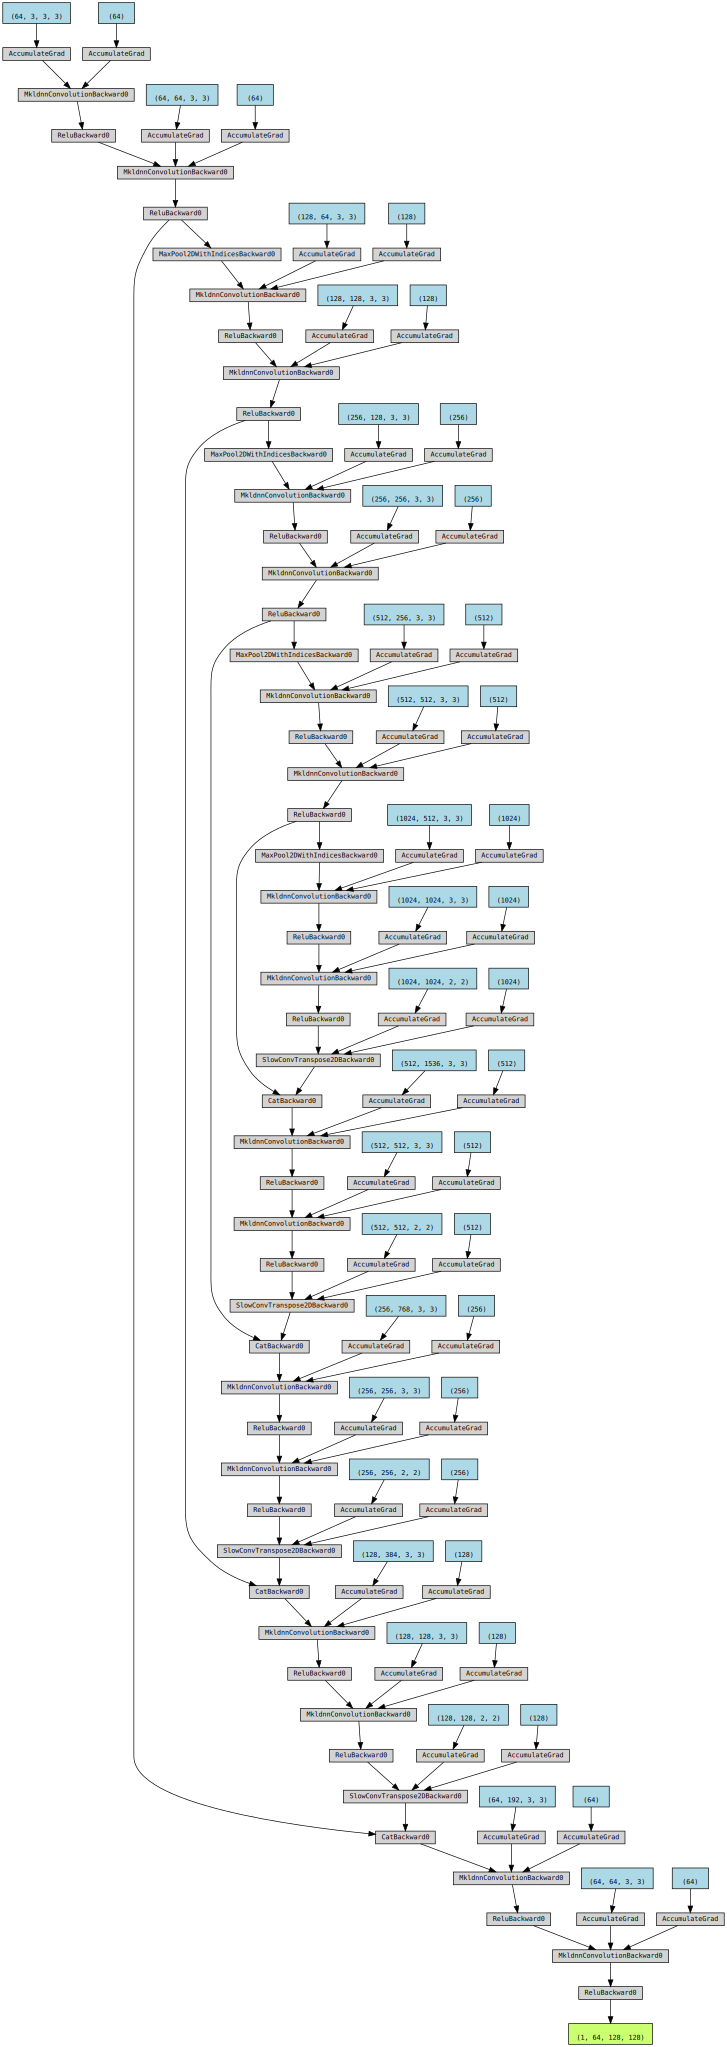

In [5]:
from torchviz import make_dot

x = torch.randn(1, 3, 128, 128)

model_1_cpu = UNET()
model_1_cpu_out = model_1_cpu(x)

#g = make_dot(out, params=None)
#g.view()
make_dot(model_1_cpu_out, params = None)

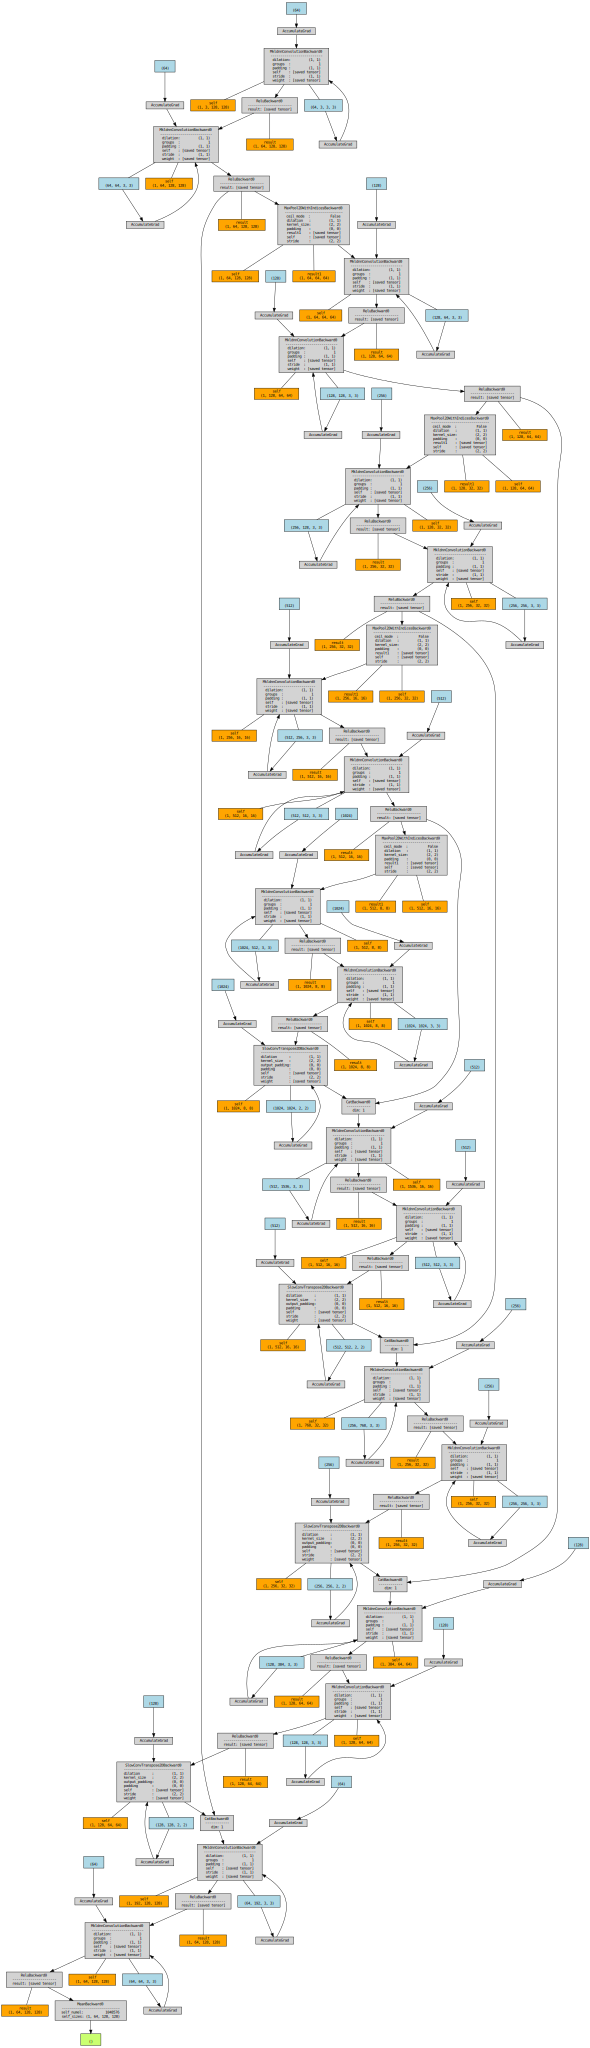

In [6]:
make_dot(model_1_cpu_out.mean(), params = None, show_attrs = True, show_saved = True)